# Depression Prediction
## Dataset Link: https://www.kaggle.com/datasets/ikynahidwin/depression-professional-dataset?resource=download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('Dataset.csv')

In [3]:
data.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


In [4]:
data = data.dropna()

In [5]:
categorical_columns = ['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']
encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

In [6]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
sleep_duration_encoded = ohe.fit_transform(data[['Sleep Duration']])
sleep_duration_df = pd.DataFrame(sleep_duration_encoded, columns=ohe.get_feature_names_out(['Sleep Duration']))
data = pd.concat([data.drop('Sleep Duration', axis=1), sleep_duration_df], axis=1)

In [7]:
data.head()

,Gender,Age,Work Pressure,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours
0,0,37,2.0,4.0,1,0,6,2,0,0,1.0,0.0,0.0
1,1,60,4.0,3.0,2,1,0,4,1,0,0.0,0.0,0.0
2,0,42,2.0,3.0,1,0,0,2,0,0,0.0,0.0,0.0
3,0,44,3.0,5.0,0,1,1,2,1,0,1.0,0.0,0.0
4,1,48,4.0,3.0,1,1,6,5,1,0,1.0,0.0,0.0


In [8]:
X = data.drop('Depression', axis=1)
y = data['Depression']

In [9]:
X.head()

,Gender,Age,Work Pressure,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours
0,0,37,2.0,4.0,1,0,6,2,0,1.0,0.0,0.0
1,1,60,4.0,3.0,2,1,0,4,1,0.0,0.0,0.0
2,0,42,2.0,3.0,1,0,0,2,0,0.0,0.0,0.0
3,0,44,3.0,5.0,0,1,1,2,1,1.0,0.0,0.0
4,1,48,4.0,3.0,1,1,6,5,1,1.0,0.0,0.0


In [10]:
y.head()

,Depression
0,0
1,0
2,0
3,0
4,0


In [11]:
imputer = SimpleImputer(strategy="most_frequent")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Dataset Shape: (2054, 13)
Missing Values:
 Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Sleep Duration_7-8 hours                 0
Sleep Duration_Less than 5 hours         0
Sleep Duration_More than 8 hours         0
dtype: int64
Target Variable Distribution:
 Depression
0    1851
1     203
Name: count, dtype: int64


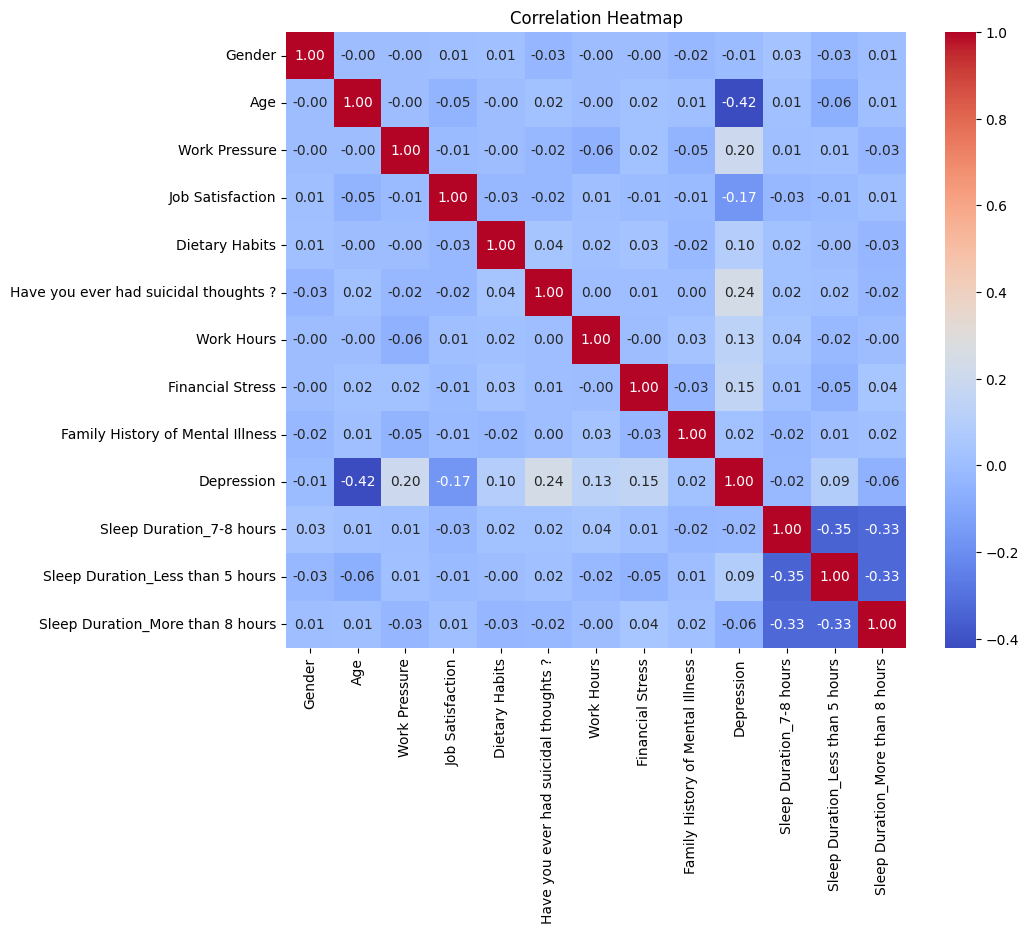

In [16]:
# EDA
# Dataset overview
print("Dataset Shape:", data.shape)
print("Missing Values:\n", data.isnull().sum())
print("Target Variable Distribution:\n", data['Depression'].value_counts())

# Correlation heatmap
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [17]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
results = {}

In [21]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
    }

results_df = pd.DataFrame(results).T
print(results_df)


                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.985401   0.972973  0.878049  0.923077
Random Forest           0.951338   1.000000  0.512195  0.677419
Support Vector Machine  0.912409   0.857143  0.146341  0.250000
K-Nearest Neighbors     0.922141   0.666667  0.439024  0.529412


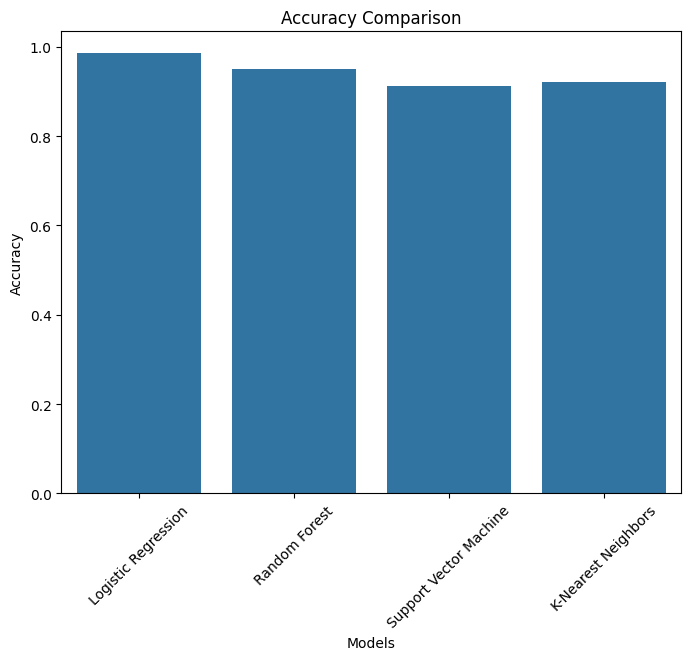

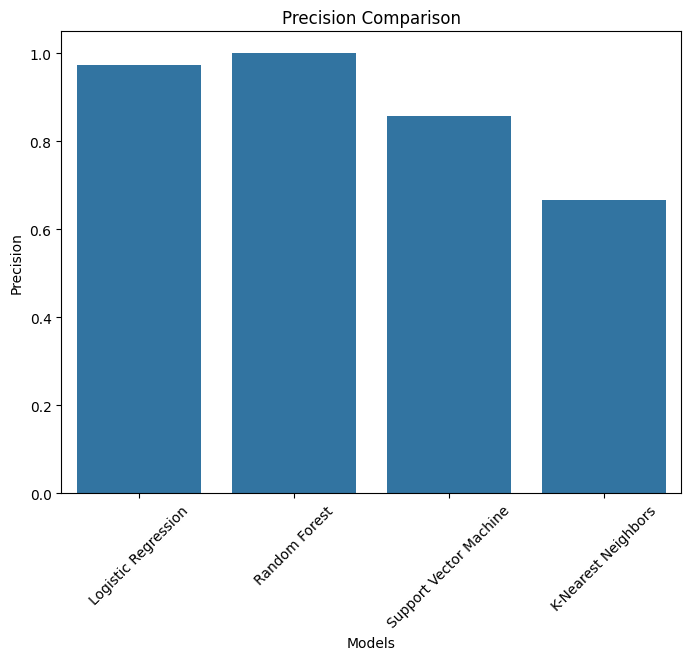

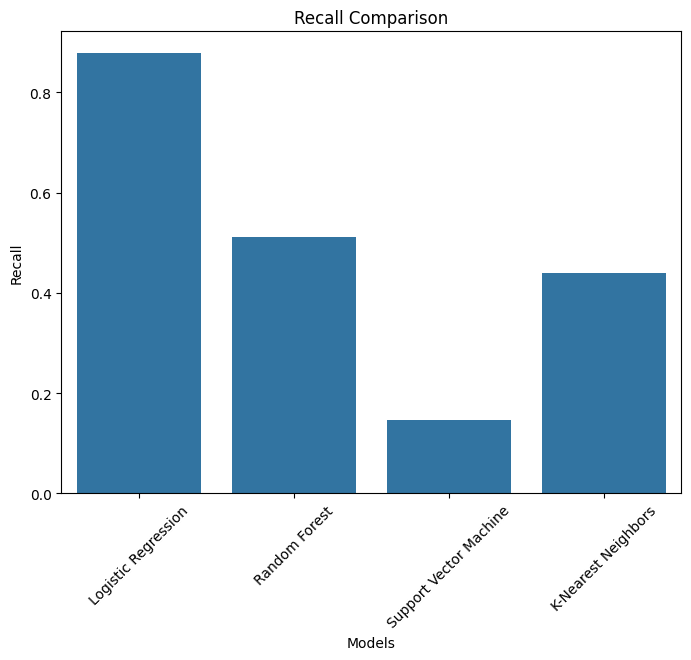

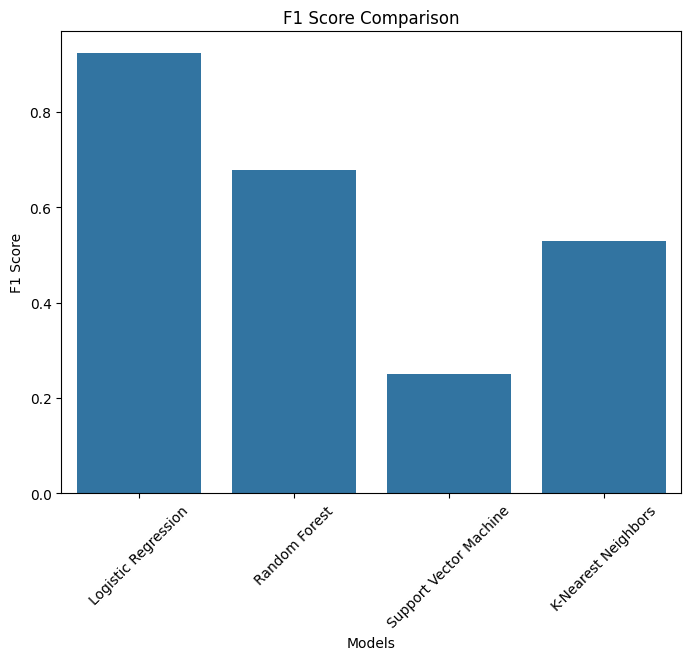

In [22]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=results_df.index, y=[results_df[metric][model] for model in results_df.index])
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xlabel('Models')
    plt.xticks(rotation=45)
    plt.show()